In [42]:
import pandas as pd
import seaborn as sns

# Introduction

Ce notebook présente une analyse exploratoire des données des émissions de gaz à effet de serre fournies par l'ADEME.
Les données utilisées dans ce notebook sont stockées dans ce repository git: https://github.com/OpenGeoScales/ogs-data-exploration/tree/main/data/ghg-emissions/ademe

In [4]:
# Load ademe data from github repository
url = 'https://raw.githubusercontent.com/OpenGeoScales/ogs-data-exploration/main/data/ghg-emissions/ademe/beges/assessments.csv'
ademe_beges_assessemnt = pd.read_csv(url, index_col=0)

In [6]:
ademe_beges_assessemnt.head(5)

,organization_name,organization_description,organization_type,collectivity_type,staff,population,consolidation_method,reporting_year,total_scope_1,total_scope_2,total_scope_3,reference_year,action_plan,reductions_scope_1_2,reductions_scope_1,reductions_scope_2,reductions_scope_3,is_draft,source_url
id,,,,,,,,,,,,,,,,,,,
1,Mutuelle d’Assurance des Instituteurs de France,Mutuelle d’assurance,Entreprise,NaN,6848.0,NaN,Opérationnel,2011,6017.00,2170.00,59931.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
2,ADIDAS France,ADIDAS France est une entreprise de distributi...,Entreprise,NaN,768.0,NaN,Opérationnel,2011,786.19,516.26,1164.09,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
3,CROUS Nice-Toulon,Les activités gérées par le CROUS de Nice-Toul...,Etablissement public,NaN,261.0,NaN,Opérationnel,2011,824.00,382.00,0.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
4,Fort de France,NaN,Collectivité territoriale (dont EPCI),Communes,3000.0,94000.0,NaN,2010,19811.00,0.00,48674.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
5,concarneau Cornouaille Agglomération,NaN,Collectivité territoriale (dont EPCI),Communes,102.0,49000.0,NaN,2011,977.16,113.10,0.00,NaN,Non,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...


In [22]:
# Get df shape
row, col = ademe_beges_assessemnt.shape
print(row)
print(col)

3271
19


Les données contiennent `3271` enregistrements d'inventaires d'émissions concernant différents types d'organismes

In [10]:
# Distribution of organization types
ademe_beges_assessemnt.groupby(['organization_type']).size()

organization_type
Association                                86
Collectivité territoriale (dont EPCI)     269
Entreprise                               2069
Etablissement public                      737
Etat                                      110
dtype: int64

# Emissions des collectivitées territoriales

Les données de l'ADEME concernent plusieurs types d'organisations: Association, collectivités territoriales, entreprises, établissement publiques...
Nous allons focaliser dans cette analyse sur les données d'émissions qui concernent les collectivités territoriales.

In [47]:
# Selecting municipality data
ademe_beges_assessement_collectivite = ademe_beges_assessemnt[ademe_beges_assessemnt['organization_type'] =='Collectivité territoriale (dont EPCI)']
ademe_beges_assessement_collectivite.head()

,organization_name,organization_description,organization_type,collectivity_type,staff,population,consolidation_method,reporting_year,total_scope_1,total_scope_2,total_scope_3,reference_year,action_plan,reductions_scope_1_2,reductions_scope_1,reductions_scope_2,reductions_scope_3,is_draft,source_url
id,,,,,,,,,,,,,,,,,,,
4,Fort de France,NaN,Collectivité territoriale (dont EPCI),Communes,3000.0,94000.0,NaN,2010,19811.00,0.00,48674.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
5,concarneau Cornouaille Agglomération,NaN,Collectivité territoriale (dont EPCI),Communes,102.0,49000.0,NaN,2011,977.16,113.10,0.00,NaN,Non,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
6,Communauté Urbaine d'Alençon,NaN,Collectivité territoriale (dont EPCI),Communes,733.0,57490.0,NaN,2012,3080.99,1485.18,7522.32,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
10,Communauté d'Agglomération de l'Espace Sud Mar...,NaN,Collectivité territoriale (dont EPCI),Communauté d'agglomération,210.0,123476.0,NaN,2012,2284.00,231.00,4271.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...
17,Valenciennes Métropole,NaN,Collectivité territoriale (dont EPCI),Communauté d'agglomération,149.0,192000.0,NaN,2011,2261.00,424.00,8634.00,NaN,Oui,NaN,NaN,NaN,NaN,Non,http://www.bilans-ges.ademe.fr/fr/bilanenligne...


## Types de collectivité territoriale
Il existe plusieurs types de collectivités terriotirales spécifiés dans le champs `organization_name`:

In [48]:
# Distribution of collectivity_type	
ademe_beges_assessemnt_municipalities.groupby(['collectivity_type']).size()

collectivity_type
Communauté Urbaine            10
Communauté d'agglomération    75
Communauté de Commune         14
Communes                      73
Départements                  81
Métropole                      9
Régions                        7
dtype: int64

## Couverture spatiale

Les données concernent `238` collectivités territoriales:

In [34]:
# Spatial coverage: Number of municpalities
ademe_beges_assessemnt_municipalities['organization_name'].nunique()

238

## Couverture temporelle
Les données contiennent des inventaires d'émission allant de `2009` à `2020`.

In [40]:
# Temporal coverage: Number of considered years
print(ademe_beges_assessemnt_municipalities['reporting_year'].min())
print(ademe_beges_assessemnt_municipalities['reporting_year'].max())

2009
2020


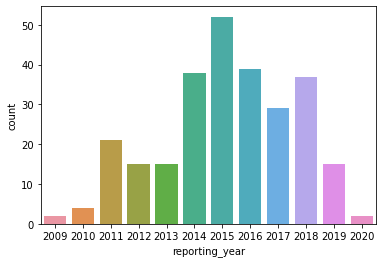

In [43]:
# plot number of reporting municipalitiees per year
ax = sns.countplot(x="reporting_year", data=ademe_beges_assessemnt_municipalities)

# Conclusion

Les traitements nécessaires pour utiliser et intégrer ces données:
- Le fichier présente des données à différentes échelles administratives *(Communauté Urbaine,Communauté d'agglomération,Communauté de Commune,Communes,Départements,Métropole, Régions)* . Il faudrait recoder la catégorsiation des échelles pour respecter une norme commune avec les autres données.
- les collectivités territoriales sont identiées à travers leurs noms. Il faudrait coiser avec un référentiel des codes administratifs pour pouvoir coroiser avec les coordonnées géographiques.